# 🚢🛳 Titanic Prediction 🛳🚢

# PART 00

# Step1: Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
%matplotlib inline

# Step2: Read Datasets

In [2]:
df = pd.read_csv('Titanic.csv')

# Step3: Check out the Data

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<AxesSubplot:>

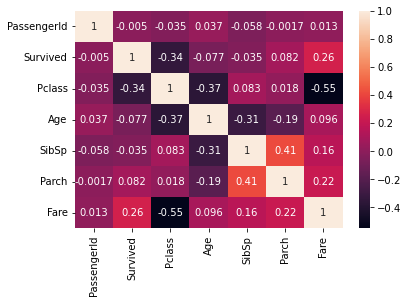

In [8]:
sns.heatmap(df.corr(),annot= True,fmt='.2g')

# Step4: Data preparation 
<hr>
<h2>Dealing with Missing Data

In [9]:
a =(df.isna().sum()/len(df))*100
a.sort_values(ascending= False)

Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
dtype: float64

In [10]:
def missing_percent(df):
    nan_percent = round((df.isna().sum()/len(df))*100, ndigits= 2)
    nan_percent = nan_percent[nan_percent>0].sort_values()
    return nan_percent

In [11]:
nan_percent = missing_percent(df)

In [12]:
nan_percent

Embarked     0.22
Age         19.87
Cabin       77.10
dtype: float64

C:\Users\Peyman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

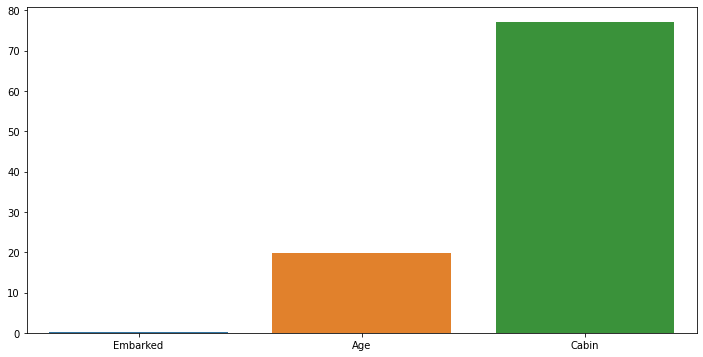

In [13]:
fig = plt.figure(figsize=(12,6))
sns.barplot(nan_percent.index, nan_percent)

#### Droping rows

In [14]:
nan_percent[nan_percent<1]

Embarked    0.22
dtype: float64

C:\Users\Peyman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 1.0)

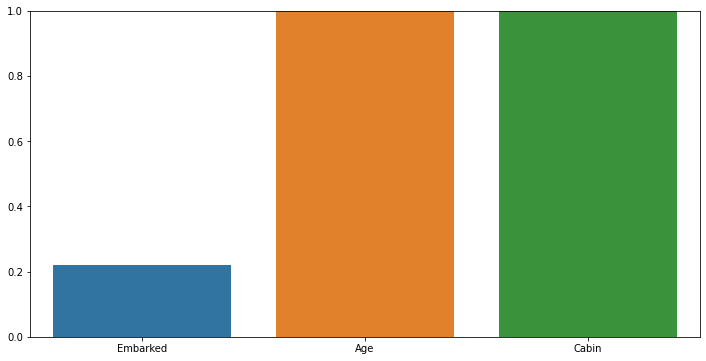

In [15]:
fig = plt.figure(figsize=(12,6))
sns.barplot(nan_percent.index, nan_percent)
plt.ylim(0,1)

Embarked column missing value percent is lower than 1%. So we could eliminate the rows that have missing values in embarked column

In [16]:
# Eliminating rows 

df = df.dropna(axis= 0, subset=['Embarked'])

In [17]:
nan_percent = missing_percent(df)
nan_percent

Age      19.91
Cabin    77.28
dtype: float64

C:\Users\Peyman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

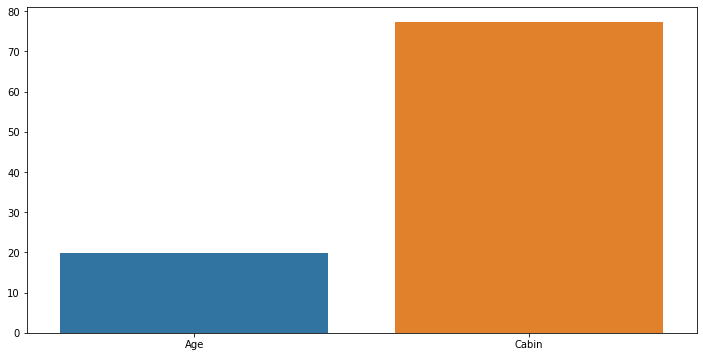

In [18]:
fig = plt.figure(figsize=(12,6))
sns.barplot(nan_percent.index, nan_percent)

#### Removing columns 
Cabin missing per cent is 77.28, and it's close to 80 per cent! So I decided to drop this column. 

In [19]:
df = df.drop(['Cabin'], axis=1)

In [20]:
nan_percent = missing_percent(df)
nan_percent

Age    19.91
dtype: float64

C:\Users\Peyman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

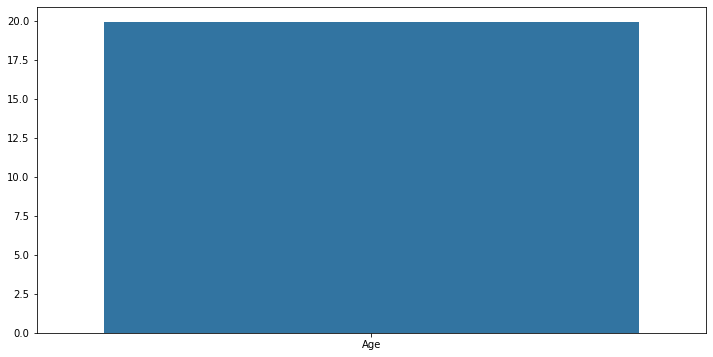

In [21]:
fig = plt.figure(figsize=(12,6))
sns.barplot(nan_percent.index, nan_percent)

####  Imputation of Missing data 

In [22]:
df.corr()['Age'].sort_values()

Pclass        -0.365902
SibSp         -0.307351
Parch         -0.187896
Survived      -0.082446
PassengerId    0.033681
Fare           0.093143
Age            1.000000
Name: Age, dtype: float64

Age has the highest negative correaltion with Pclass.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

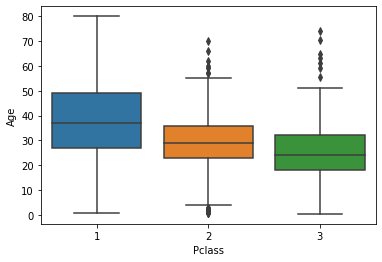

In [23]:
sns.boxplot(data=df, x= 'Pclass', y='Age')

In [24]:
df.groupby('Pclass').mean()['Age']

Pclass
1    38.105543
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [25]:
df['Age'] = df.groupby('Pclass')['Age'].transform(lambda x:x.fillna(x.mean()))

In [26]:
nan_percent = missing_percent(df)
nan_percent

Series([], dtype: float64)

#### Hint: Now, we don't have any Missing Data.

## 🟣Creating Dummy Variables

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 115.6+ KB


We don't need 'PassengerId', 'Ticket', 'Name' as our features cause they aren't helpful as a feature. 

In [28]:
df = df.drop(['PassengerId', 'Ticket', 'Name'], axis=1)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 94.8+ KB


We consider Pclass as a categorical feature. So we should change Pclass's Dtype from int64 to object. (Numerical columns to caategorical)

In [30]:
df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [31]:
df['Pclass'] = df['Pclass'].transform(lambda x:str(x))

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    object 
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 94.8+ KB


Creating dummy variables

In [33]:
df_obj = df.select_dtypes(include= 'object')
df_num = df.select_dtypes(exclude= 'object')

In [34]:
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Pclass    889 non-null    object
 1   Sex       889 non-null    object
 2   Embarked  889 non-null    object
dtypes: object(3)
memory usage: 60.1+ KB


In [35]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Age       889 non-null    float64
 2   SibSp     889 non-null    int64  
 3   Parch     889 non-null    int64  
 4   Fare      889 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 74.0 KB


In [36]:
# Converting 

df_obj = pd.get_dummies(data= df_obj, drop_first= True)

In [37]:
df_obj.shape

(889, 5)

In [38]:
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Pclass_2    889 non-null    uint8
 1   Pclass_3    889 non-null    uint8
 2   Sex_male    889 non-null    uint8
 3   Embarked_Q  889 non-null    uint8
 4   Embarked_S  889 non-null    uint8
dtypes: uint8(5)
memory usage: 43.6 KB


In [39]:
df = pd.concat([df_num,df_obj], axis=1)

In [40]:
df.shape

(889, 10)

In [41]:
df.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,1,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,1,1,0,1


<AxesSubplot:>

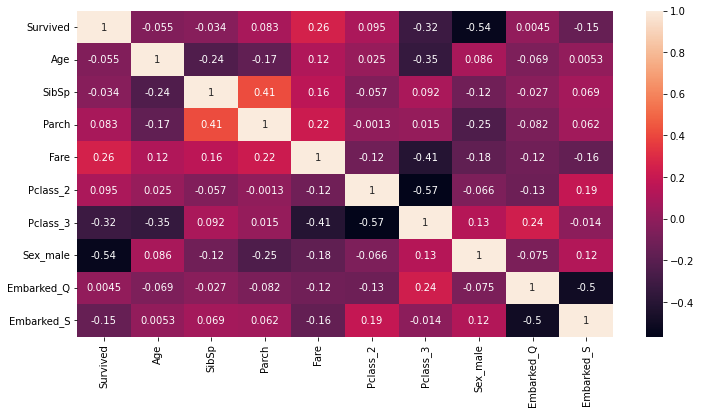

In [42]:
fig = plt.figure(figsize=(12,6))
sns.heatmap(data= df.corr(),annot= True,fmt='.2g')

# Step5: Train Test Split

In [43]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [44]:
X.head()

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,0,1,1,0,1
1,38.0,1,0,71.2833,0,0,0,0,0
2,26.0,0,0,7.9250,0,1,0,0,1
3,35.0,1,0,53.1000,0,0,0,0,1
4,35.0,0,0,8.0500,0,1,1,0,1


In [45]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Step6: Scaling Data

In [47]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalar.fit(X_train)

scaled_X_train = scalar.transform(X_train)
scaled_X_test  = scalar.transform(X_test)

# PART 01

# Step7: Build the model ---> Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()
logistic_model.fit(scaled_X_train, y_train)

LogisticRegression()

In [49]:
# Model Coefs

logistic_model.coef_

array([[-0.42259781, -0.3168426 , -0.10561091,  0.0801413 , -0.35047289,
        -1.03746938, -1.26569231,  0.02460477, -0.18183451]])

# Step8: Predict

In [50]:
y_pred = logistic_model.predict(scaled_X_test)

# Step9: Evaluate model

## 🟣 Confusion Matrix

In [51]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[98,  9],
       [23, 48]], dtype=int64)

### Classification Report

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       107
           1       0.84      0.68      0.75        71

    accuracy                           0.82       178
   macro avg       0.83      0.80      0.80       178
weighted avg       0.82      0.82      0.82       178



### Plot Confusion Matrix

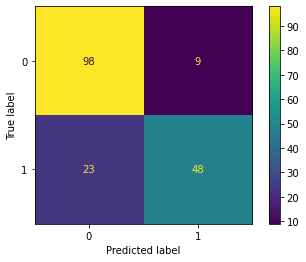

In [53]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logistic_model, X= scaled_X_test, y_true= y_test)

## 🟣 Accuracy Score

In [54]:
from sklearn.metrics import accuracy_score
logistic_accuracy_score= accuracy_score(y_test, y_pred)
logistic_accuracy_score

0.8202247191011236

## 🟣 Precision Score

In [55]:
from sklearn.metrics import precision_score
logistic_precision_score= precision_score(y_test, y_pred)
logistic_precision_score

0.8421052631578947

## 🟣 Recall score

In [56]:
from sklearn.metrics import recall_score
logistic_recall_score= recall_score(y_test, y_pred)
logistic_recall_score

0.676056338028169

## 🟣 F1-score

In [57]:
from sklearn.metrics import f1_score
logistic_f1_score= f1_score(y_test, y_pred)
logistic_f1_score

0.75

## 🟣 Curves & AUC

### Plot Precision Recall Curve

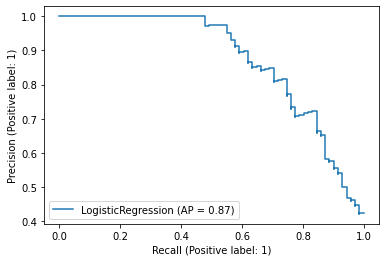

In [58]:
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(logistic_model, X=scaled_X_test, y= y_test)

### Plot Roc Curve

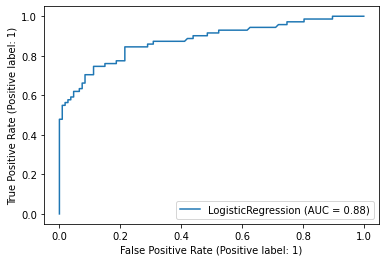

In [59]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(logistic_model, X= scaled_X_test, y= y_test)

# Step10: Create DataFrame From Accuracy & Precision & Recall & F1-score

In [60]:
df_LogisticRegression_scores = pd.DataFrame({'Accuracy Score': logistic_accuracy_score, 'Precision Score': logistic_precision_score, 'Recall Score': logistic_recall_score ,'F1 Score': logistic_f1_score}, index=['Logistic Regreesion'])
df_LogisticRegression_scores

,Accuracy Score,Precision Score,Recall Score,F1 Score
Logistic Regreesion,0.820225,0.842105,0.676056,0.75


# PART 02

# Step11: Build the model ---> KNN

In [61]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors= 3)
knn_model.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

# Step12: Predict

In [62]:
y_pred_knn = knn_model.predict(scaled_X_test)

# Step13: Evaluate model

## 🟣 Confusion Matrix

In [63]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_knn)

array([[89, 18],
       [18, 53]], dtype=int64)

### Classification Report

In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       107
           1       0.75      0.75      0.75        71

    accuracy                           0.80       178
   macro avg       0.79      0.79      0.79       178
weighted avg       0.80      0.80      0.80       178



### Plot Confusion Matrix

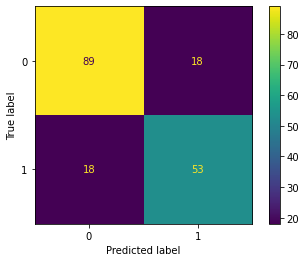

In [65]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn_model, X= scaled_X_test, y_true= y_test)

## 🟣 Accuracy Score

In [66]:
from sklearn.metrics import accuracy_score
knn_accuracy_score = accuracy_score(y_test, y_pred_knn)
knn_accuracy_score

0.797752808988764

## 🟣 Precision Score

In [67]:
from sklearn.metrics import precision_score
knn_precision_score = precision_score(y_test, y_pred_knn)
knn_precision_score

0.7464788732394366

## 🟣 Recall score

In [68]:
from sklearn.metrics import recall_score
knn_recall_score = recall_score(y_test, y_pred_knn)
knn_recall_score

0.7464788732394366

## 🟣 F1-score

In [69]:
from sklearn.metrics import f1_score
knn_f1_score = f1_score(y_test, y_pred_knn)
knn_f1_score

0.7464788732394367

# Step14: Elbow Method for Choosing Reasonable K Values

In [70]:
test_error_rate= []

for k in range(1,33):
    
    # train
    knn_model= KNeighborsClassifier(n_neighbors= k)
    knn_model.fit(scaled_X_train, y_train)
    
    # prediction
    y_pred_test = knn_model.predict(scaled_X_test)
    test_error = 1-accuracy_score(y_test, y_pred_test)
    test_error_rate.append(test_error)

In [71]:
test_error_rate

[0.2640449438202247,
 0.2191011235955056,
 0.202247191011236,
 0.1797752808988764,
 0.1797752808988764,
 0.1573033707865169,
 0.1629213483146067,
 0.1741573033707865,
 0.1685393258426966,
 0.1741573033707865,
 0.1741573033707865,
 0.1741573033707865,
 0.1629213483146067,
 0.1741573033707865,
 0.1741573033707865,
 0.1741573033707865,
 0.1741573033707865,
 0.1797752808988764,
 0.1853932584269663,
 0.1797752808988764,
 0.1910112359550562,
 0.1797752808988764,
 0.1910112359550562,
 0.1910112359550562,
 0.1910112359550562,
 0.1910112359550562,
 0.1910112359550562,
 0.1910112359550562,
 0.1853932584269663,
 0.1910112359550562,
 0.1853932584269663,
 0.1910112359550562]

### Plot

Text(0.5, 0, 'K value')

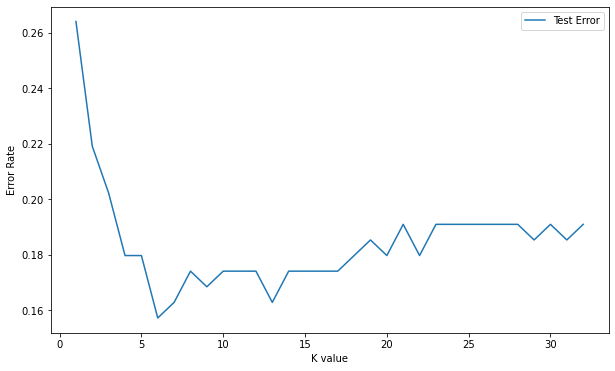

In [72]:
fig = plt.figure(figsize= (10,6))
plt.plot(range(1,33), test_error_rate, label= 'Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel('K value')

K= 6 is reasonable

# Step15: Creating a Pipeline to find best K value

In [73]:
scaler = StandardScaler()

In [74]:
knn = KNeighborsClassifier()

In [75]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [76]:
operations = [('scaler',scaler),('knn',knn)]

In [77]:
from sklearn.pipeline import Pipeline

In [78]:
pipe = Pipeline(operations)

In [79]:
from sklearn.model_selection import GridSearchCV

In [80]:
k_values= list(range(1,33))

In [81]:
param_grid = {'knn__n_neighbors': k_values}

In [82]:
full_cv_classifier= GridSearchCV(pipe, param_grid= param_grid, cv= 5, scoring='accuracy')

In [83]:
full_cv_classifier.fit(X_train, y_train) 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29, 30, ...]},
             scoring='accuracy')

In [84]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=20))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=20),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 20,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [85]:
full_cv_classifier.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_knn__n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

# Step16: Final Model

## 🟣 Fit model with the best K value

In [86]:
scaler = StandardScaler()
knn20 = KNeighborsClassifier(n_neighbors= 20)
operations= [('scaler',scaler),('knn20',knn20)]
pipe_knn20 = Pipeline(operations)
pipe_knn20.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn20', KNeighborsClassifier(n_neighbors=20))])

## 🟣 Predict

In [87]:
knn20_pred= pipe_knn20.predict(X_test)


## 🟣 Evaluating the Model

### Confusion Matrix

In [88]:
confusion_matrix(y_test, knn20_pred)

array([[104,   3],
       [ 29,  42]], dtype=int64)

#### Classification Report

In [89]:
print(classification_report(y_test, knn20_pred))

              precision    recall  f1-score   support

           0       0.78      0.97      0.87       107
           1       0.93      0.59      0.72        71

    accuracy                           0.82       178
   macro avg       0.86      0.78      0.80       178
weighted avg       0.84      0.82      0.81       178



#### Plot Confusion Matrix

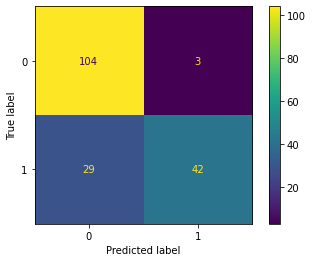

In [90]:
plot_confusion_matrix(pipe_knn20, X= X_test, y_true= y_test)

### Acuracy

In [91]:
knn20_accuracy= accuracy_score(y_test, knn20_pred)
knn20_accuracy

0.8202247191011236

### Precision Score

In [92]:
knn20_precision= precision_score(y_test, knn20_pred)
knn20_precision

0.9333333333333333

### Recall score

In [93]:
knn20_recall= recall_score(y_test, knn20_pred)
knn20_recall

0.5915492957746479

### F1-score

In [94]:
knn20_f1= f1_score(y_test, knn20_pred)
knn20_f1

0.7241379310344829

### Predict with a sample

In [95]:
X.columns

Index(['Age', 'SibSp', 'Parch', 'Fare', 'Pclass_2', 'Pclass_3', 'Sex_male',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [96]:
# define a function to print passenger survived or not
def is_survived(knn20_pred_example):
    if knn20_pred_example[0] == 1:
        print(f'Model output: {knn20_pred_example[0]}')
        print('This passenger was Survived')
    elif knn20_pred_example[0] == 0:
        print(f'Model output: {knn20_pred_example[0]}')
        print('This passenger wasn not survived')
    else:
        print(f'Model output: {knn20_pred_example[0]}')
        print('Output is not valid')

In [97]:
# Example 1 
#Age: 20
#SibSp: 0
#Parch: 2
#Fare: 70
#Pclass_2: 0 (first class)
#Pclass_3: 0 (first class)
#Sex_male: 1
#Embarked_Q: 0
#Embarked_S: 1

knn20_pred_example1 = pipe_knn20.predict([[20,0,2,70,0,0,1,0,1]])
knn20_pred_example1
      

array([1], dtype=int64)

In [98]:
is_survived(knn20_pred_example1)

Model output: 1
This passenger was Survived


In [99]:
# Example 2 
#Age: 60
#SibSp: 0
#Parch: 2
#Fare: 70
#Pclass_2: 0 (first class)
#Pclass_3: 0 (first class)
#Sex_male: 1
#Embarked_Q: 0
#Embarked_S: 1

knn20_pred_example2 = pipe_knn20.predict([[60,0,2,70,0,0,1,0,1]])
knn20_pred_example2
      

array([0], dtype=int64)

In [100]:
is_survived(knn20_pred_example2)

Model output: 0
This passenger wasn not survived


# Step17: Create DataFrame From Accuracy & Precision & Recall & F1-score(Final Model)

In [101]:
df_knn_scores = pd.DataFrame({'Accuracy Score': knn20_accuracy, 'Precision Score': knn20_precision, 'Recall Score': knn20_recall ,'F1 Score': knn20_f1}, index=['KNN'])
df_knn_scores

,Accuracy Score,Precision Score,Recall Score,F1 Score
KNN,0.820225,0.933333,0.591549,0.724138


# PART 03

# Step18: Build the model ---> SVM

In [102]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(scaled_X_train, y_train)

SVC()

# Step19: Predict

In [103]:
y_pred_svm = svm_model.predict(scaled_X_test)

# Step20: Evaluate model

## 🟣 Confusion Matrix

In [104]:
confusion_matrix(y_test, y_pred_svm)

array([[103,   4],
       [ 24,  47]], dtype=int64)

### Classification Report

In [105]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88       107
           1       0.92      0.66      0.77        71

    accuracy                           0.84       178
   macro avg       0.87      0.81      0.83       178
weighted avg       0.86      0.84      0.84       178



### Plot Confusion Matrix

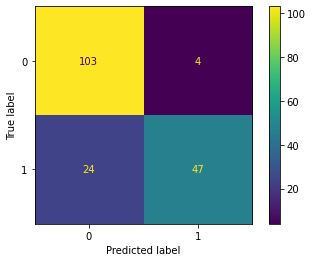

In [106]:
plot_confusion_matrix(svm_model, X= scaled_X_test, y_true= y_test)

## 🟣Acuracy

In [107]:
svm_accuracy= accuracy_score(y_test, y_pred_svm)
svm_accuracy

0.8426966292134831

## 🟣 Precision Score

In [108]:
svm_precision= precision_score(y_test, y_pred_svm)
svm_precision

0.9215686274509803

## 🟣 Recall score

In [109]:
svm_recall= recall_score(y_test, y_pred_svm)
svm_recall

0.6619718309859155

## 🟣 F1-score

In [110]:
svm_f1= f1_score(y_test, y_pred_svm)
svm_f1

0.7704918032786885

# Step21: Final Model
<hr>
<h1> Hyperparameters
<h4> Choosing the best hyperparameters through GridSearchCV

## 🟣 Fit model with the best hyperparameters

In [111]:
from sklearn.model_selection import GridSearchCV
svm= SVC()
param_grid= {'C': [0.01,0.1,1, 10, 100],'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['linear','rbf']}
grid = GridSearchCV(svm, param_grid= param_grid, cv=5)

In [112]:
grid.fit(scaled_X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf']})

In [113]:
grid.best_estimator_

SVC(C=1, gamma=0.1)

In [114]:
grid.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

## 🟣 Predict

In [115]:
y_pred_svm_best= grid.predict(scaled_X_test) 

## 🟣 Evaluating the Model

### Confusion Matrix

In [116]:
confusion_matrix(y_test, y_pred_svm_best)

array([[103,   4],
       [ 24,  47]], dtype=int64)

#### Classification Report

In [117]:
print(classification_report(y_test, y_pred_svm_best))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88       107
           1       0.92      0.66      0.77        71

    accuracy                           0.84       178
   macro avg       0.87      0.81      0.83       178
weighted avg       0.86      0.84      0.84       178



#### Plot Confusion Matrix

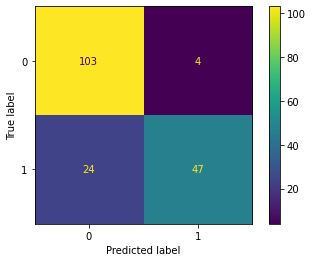

In [118]:
plot_confusion_matrix(grid, X= scaled_X_test, y_true= y_test)

### Acuracy

In [119]:
svm_best_accuracy= accuracy_score(y_test, y_pred_svm_best)
svm_best_accuracy

0.8426966292134831

### Precision Score

In [120]:
svm_best_precision= precision_score(y_test, y_pred_svm_best)
svm_best_precision

0.9215686274509803

### Recall score

In [121]:
svm_best_recall= recall_score(y_test, y_pred_svm_best)
svm_best_recall

0.6619718309859155

### F1-score

In [122]:
svm_best_f1= f1_score(y_test, y_pred_svm_best)
svm_best_f1

0.7704918032786885

# Step22: Create DataFrame From Accuracy & Precision & Recall & F1-score(Final Model)

In [123]:
df_svm_scores= pd.DataFrame({'Accuracy Score': svm_best_accuracy, 'Precision Score': svm_best_precision, 'Recall Score': svm_best_recall,'F1 Score': svm_best_f1}, index=['SVM'])

In [124]:
df_svm_scores

,Accuracy Score,Precision Score,Recall Score,F1 Score
SVM,0.842697,0.921569,0.661972,0.770492


# Step23: Create DataFrame From Accuracy & Precision & Recall & F1-score
<hr>
<h3>Concanate All Models dataframes (Step10, Step17, Step22)

In [125]:
final_df= pd.concat([df_LogisticRegression_scores, df_knn_scores, df_svm_scores])

In [126]:
final_df

,Accuracy Score,Precision Score,Recall Score,F1 Score
Logistic Regreesion,0.820225,0.842105,0.676056,0.750000
KNN,0.820225,0.933333,0.591549,0.724138
SVM,0.842697,0.921569,0.661972,0.770492
